<a href="https://colab.research.google.com/github/EsterMariaPaul/Analysis/blob/main/WineSVM_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [ ]:
#load the wine quality dataset
df= pd.read_csv('winequality-red.csv')

In [ ]:
# convert wine quality into binary classification (good:1,bad:0)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [ ]:
#split into features(X and target variable(y))
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#initialize classifiers
svm_clf = SVC(kernel='rbf', C=1.0, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

#train models
svm_clf.fit(X_train_scaled, y_train)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#make predictions
y_pred_svm = svm_clf.predict(X_test_scaled)
y_pred_dt = dt_clf.predict(X_test)

In [ ]:
#evaluate models
metrics_dict = {
    "model": ["SVM", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt)],
    "Precision" : [precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_dt)],
    "Recall" : [recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_dt)],
    "F1-score" : [f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_dt)]
}

#convert to DataFrame for visualizations
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,model,Accuracy,Precision,Recall,F1-score
0,SVM,0.771875,0.811765,0.770950,0.790831
1,Decision Tree,0.731250,0.768786,0.743017,0.755682


<Figure size 1000x600 with 0 Axes>

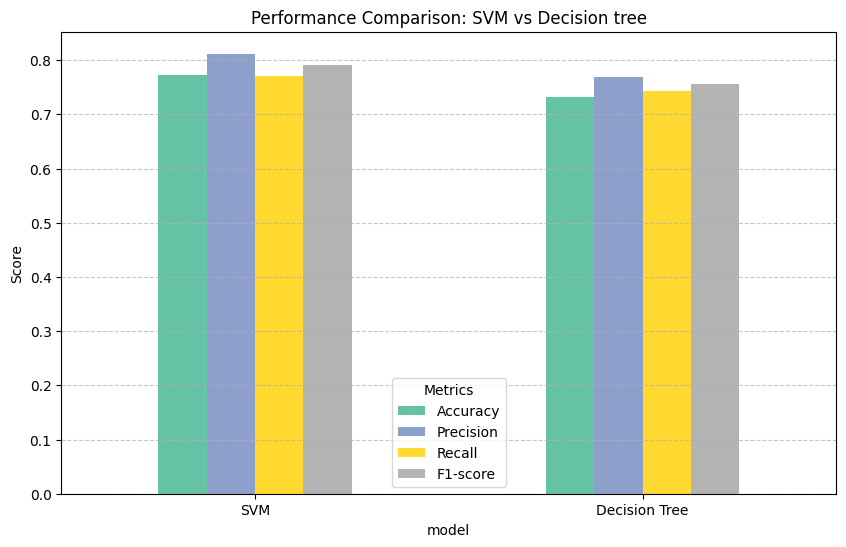

In [ ]:
#plot the results as a bar chart
plt.figure(figsize=(10, 6))
metrics_df.set_index("model").plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Performance Comparison: SVM vs Decision tree")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()